# Deep

Deep learning using the "from scratch" chapter examples;
see the textbook code in scratch/deep_learning.py 
and the explanations in chapter 19.

Jim M | April 2020

In [27]:
import scratch.deep_learning as dl          # dl : "from scratch" deep learning code
import tqdm                                 # interactive progress bar
import random
from matplotlib import pyplot as plt

### XOR

In [28]:
def xor_revisited():
    """ This is adapted directly from scratch.main() """
    
    # training data : false,false => false
    #                 false,true  => true
    #                 true,false  => true
    #                 true,true   => false
    #
    # With 0 as false and 1 as true this is :
    #                 
    xs = [[0., 0], [0., 1], [1., 0], [1., 1]]    # training inputs
    ys = [[0.],    [1.],    [1.],    [0.]]       # training outputs

        # glorious ascii art for this XOR network
        #
        #                -------
        #    input1 ---  | XOR |                       This is an XOR gate
        #                |     | --- output1           as a 2-input, 1-ouput thing.
        #    input2 ---  |     |
        #                -------
        # 
        #           layer 1          layer 2              layer 3
        #
        # input1   --  . - o --      --- sigmoid() -----  .
        #              \/                                  \
        #              /\                                   \
        # input2   -- . - o --       --- sigmoid() -----  . - o --  output1 

    # layer 1 has 2 inputs and 2 outputs,
    # There is a weight w_ij for each connection, and a bias for each input.
    # So that's w_11, w_12, w_21, w_22, b_1, b_2 for a total of 6 parameters.
    #
    # layer 2 is just the application of the sigmoid() function,
    # to each value moving forward. Just a smoothed step function. No parmaters.
    #
    # layer 3 has 2 inputs and 1 output.
    # There is again a weight w_ij for each connection and a bias for each input.
    # So that's w_11, w_12, b_1, for a total of 3 parameters.
    #
    # Therefore the whole network has 9 parameters that define it.
    
    net = dl.Sequential([
        dl.Linear(input_dim=2, output_dim=2),  
        dl.Sigmoid(),
        dl.Linear(input_dim=2, output_dim=1)
    ])
        
    optimizer = dl.GradientDescent(learning_rate=0.1)   # method for getting better
    loss = dl.SSE()                                     # error = squared some of errors

    losses = []   # plottable convergence rate
    
    with tqdm.trange(3000) as t:
        for epoch in t:
            epoch_loss = 0.0
    
            for x, y in zip(xs, ys):
                predicted = net.forward(x)                  # find f(xs)
                epoch_loss += loss.loss(predicted, y)       # get printable convergence
                gradient = loss.gradient(predicted, y)      # find downward direction
                net.backward(gradient)                      # put 'downward' into net
                optimizer.step(net)                         # change net by small step
    
            t.set_description(f"xor loss {epoch_loss:.3f}")
            losses += [epoch_loss]
    
    return (net, losses)


In [29]:
(net, losses) = xor_revisited()

xor loss 0.000: 100%|██████████| 3000/3000 [00:03<00:00, 801.41it/s]


In [26]:
list(net.params())

[[[-1.4893068234238553, -1.6075683496912485],
  [-3.421022119352768, -4.323073604480412]],
 [1.7993747752867089, 0.3967565491170266],
 [[3.194055718052233, -3.4412452169352226]],
 [-0.683183847023091]]

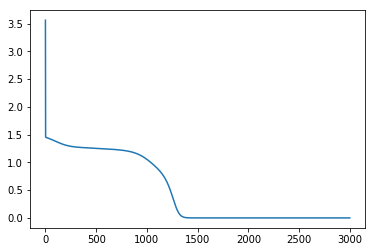

In [32]:
plt.plot(losses);

In [41]:
# And here's how it does :
#
for (in1, in2) in ((0,0), (0,1), (1,0), (1,1)):
    out = net.forward((in1, in2))
    print(f" ({in1}, {in2}) => {out[0]:.20f}")

 (0, 0) => 0.00000000000000000000
 (0, 1) => 0.99999999999999933387
 (1, 0) => 0.99999999999999955591
 (1, 1) => 0.00000000000000077716


In [20]:
net.layers

In [23]:
net.layers[0].w

[[-1.6425160695224101, -1.4948117798303153],
 [-4.567646572029667, -3.3649176350731924]]